
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [64]:

import numpy as np
import matplotlib.pyplot as plt


In [65]:
np.random.seed(0)

X = np.random.rand(100, 2)
y = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 0.1


In [66]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1
        return self

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [67]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.W) + self.b
            error = y_pred - y

            loss = (1/(2*n_samples)) * np.sum(error**2) + \
                   (self.l2_lambda/2) * np.sum(self.W**2)
            self.losses.append(loss)

            dW = (1/n_samples) * np.dot(X.T, error) + self.l2_lambda * self.W
            db = (1/n_samples) * np.sum(error)

            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.W) + self.b



In [68]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [69]:
model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


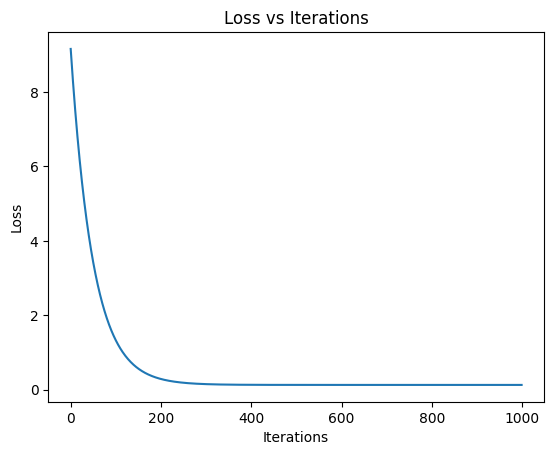

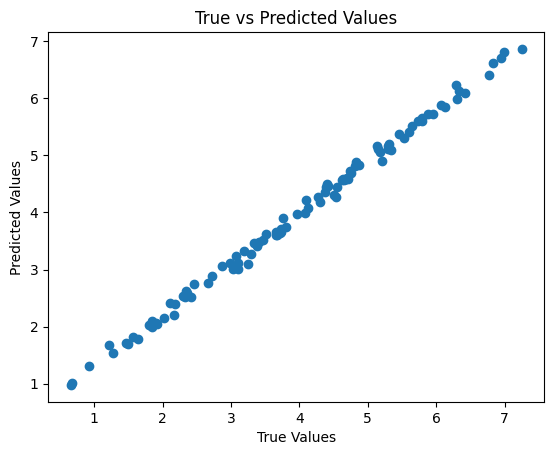

In [70]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.show()

plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [71]:
import numpy as np
import matplotlib.pyplot as plt


In [72]:
np.random.seed(0)

X = np.random.rand(100, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # binary output


In [73]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [74]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            linear = np.dot(X, self.W) + self.b
            y_pred = self.sigmoid(linear)

            # Binary Cross Entropy Loss + L2
            loss = (-1/n_samples) * np.sum(
                y * np.log(y_pred + 1e-9) +
                (1 - y) * np.log(1 - y_pred + 1e-9)
            ) + (self.l2_lambda / 2) * np.sum(self.W ** 2)

            self.losses.append(loss)

            # Gradients
            dW = (1/n_samples) * np.dot(X.T, (y_pred - y)) + self.l2_lambda * self.W
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        linear = np.dot(X, self.W) + self.b
        probs = self.sigmoid(linear)
        return


In [75]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)


In [76]:
model = LogisticRegressionScratch(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


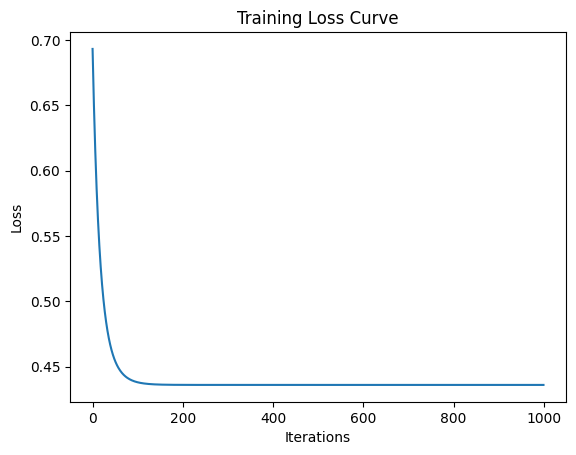

In [77]:
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [78]:
import numpy as np


In [79]:
np.random.seed(0)

M = np.random.rand(6, 6)   # example matrix (n x m)
k = 3                      # number of clusters


In [80]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    rows, cols = M.shape
    
    # Flatten matrix (cluster individual elements)
    X = M.reshape(-1, 1)
    
    # Initialize random centroids
    centroids = np.random.choice(X.flatten(), k, replace=False)
    
    for _ in range(max_iters):
        # Compute distances and assign clusters
        distances = np.abs(X - centroids.reshape(1, -1))
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = []
        for i in range(k):
            if np.any(labels == i):
                new_centroids.append(np.mean(X[labels == i]))
            else:
                new_centroids.append(centroids[i])
        
        new_centroids = np.array(new_centroids)
        
        # Check convergence
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    # Reshape labels back to matrix shape
    assignment_table = labels.reshape(rows, cols)
    
    # Create cookbook
    cookbook = {}
    for i in range(k):
        cookbook[i] = list(zip(*np.where(assignment_table == i)))
    
    return assignment_table, cookbook, centroids



In [81]:
assignment_table, cookbook, centroids = kmeans_matrix(M, k)


In [82]:
print("Original Matrix M:\n", M)
print("\nAssignment Table:\n", assignment_table)
print("\nCentroids:\n", centroids)
print("\nCookbook:")
for key in cookbook:
    print(f"Cluster {key}:", cookbook[key])


Original Matrix M:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985]
 [0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918]
 [0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355 ]]

Assignment Table:
 [[0 2 0 0 0 0]
 [0 2 2 0 2 0]
 [0 2 1 1 1 2]
 [2 2 2 2 0 2]
 [1 0 1 2 0 0]
 [1 2 0 0 1 0]]

Centroids:
 [0.52275673 0.1033367  0.84968802]

Cookbook:
Cluster 0: [(0, 0), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 3), (1, 5), (2, 0), (3, 4), (4, 1), (4, 4), (4, 5), (5, 2), (5, 3), (5, 5)]
Cluster 1: [(2, 2), (2, 3), (2, 4), (4, 0), (4, 2), (5, 0), (5, 4)]
Cluster 2: [(0, 1), (1, 1), (1, 2), (1, 4), (2, 1), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 5), (4, 3), (5, 1)]


In [83]:
Assignment_5.ipynb


NameError: name 'Assignment_5' is not defined


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
